In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.initializers import glorot_normal
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('E:/BaiduNetdiskDownload/论文/ALF_Data.csv')
data.dropna(subset = ['Hepatitis'], inplace = True)
for i in ['Weight', 'Height', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol']:
    data.loc[:, i] = SimpleImputer(strategy = 'mean').fit_transform(data[i].values.reshape(-1, 1))
for i in ['Obesity', 'Physical Activity', 'Education', 'Unmarried', 'Income', 'PoorVision', 'HyperTension', 'Family Hepatitis', 'Chronic Fatigue', 'ALF']:
    data.loc[:, i] = SimpleImputer(strategy = 'most_frequent').fit_transform(data[i].values.reshape(-1, 1))
data.loc[:, 'Body Mass Index'] = data['Weight'] / ((data['Height'] / 100) ** 2)
data.loc[:, 'Total Cholesterol'] = data['Good Cholesterol'] + data['Bad Cholesterol']
for i in ['Gender', 'Region', 'Source of Care']:
    data.loc[:, i] = OrdinalEncoder().fit_transform(data[i].values.reshape(-1, 1))
dense_features=['Age','Weight','Height',
                'Body Mass Index','Waist','Maximum Blood Pressure',
                'Minimum Blood Pressure','Good Cholesterol','Bad Cholesterol',
                'Total Cholesterol']
mms = MinMaxScaler(feature_range=(0, 1))
data.loc[:, dense_features] = mms.fit_transform(data[dense_features])
data.loc[:, 'Hepatitis'] = data['Hepatitis'].astype('int')
train = data.iloc[:6000]
test = data.iloc[6000:]
Xtrain = train.loc[:, train.columns != 'Hepatitis']
Ytrain = train.loc[:, 'Hepatitis']
Xtest = test.loc[:, test.columns != 'Hepatitis']
Ytest = test.loc[:, 'Hepatitis']

In [4]:
data

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,0.692308,1.0,0.0,0.181276,0.454806,0.170407,0.0,0.218451,0.391304,0.500000,...,0.0,1,0.0,0,0.0,1,1,0.0,0.0,0.0
1,0.246154,1.0,2.0,0.206321,0.456241,0.199274,0.0,0.157528,0.149068,0.344262,...,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0
2,0.707692,1.0,0.0,0.347645,0.460545,0.362724,1.0,0.476066,0.267081,0.385246,...,0.0,1,0.0,0,1.0,0,0,0.0,0.0,0.0
3,0.523077,1.0,0.0,0.261181,0.431851,0.273890,0.0,0.168842,0.236025,0.385246,...,0.0,1,0.0,0,0.0,0,0,0.0,0.0,0.0
4,0.661538,1.0,1.0,0.283244,0.413199,0.308851,0.0,0.268059,0.372671,0.516393,...,0.0,0,1.0,0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,0.230769,0.0,0.0,0.264758,0.589670,0.216142,0.0,0.252393,0.260870,0.540984,...,0.0,1,0.0,1,0.0,1,0,0.0,0.0,0.0
8781,0.707692,0.0,1.0,0.455575,0.721664,0.352893,1.0,0.476066,0.279503,0.508197,...,0.0,0,1.0,0,0.0,1,0,0.0,0.0,0.0
8782,0.261538,0.0,2.0,0.350626,0.797704,0.227105,0.0,0.305483,0.447205,0.590164,...,0.0,0,1.0,0,0.0,0,0,0.0,0.0,0.0
8783,0.292308,0.0,0.0,0.396541,0.780488,0.274399,0.0,0.345518,0.304348,0.532787,...,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0


In [5]:
auc = []
loss = []
epoch = ['softmax', 'sigmoid', 'tanh', 'relu']
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = i,kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'relu',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 35ms/step - loss: 1.9457 - auc: 0.4971 - val_loss: 1.4624 - val_auc: 0.5383
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 1.1514 - auc: 0.4981 - val_loss: 0.8634 - val_auc: 0.5070
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6978 - auc: 0.4969 - val_loss: 0.5402 - val_auc: 0.5453
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4695 - auc: 0.4988 - val_loss: 0.3881 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 19ms/step - loss: 1.6772 - auc: 0.5464 - val_loss: 1.2395 - val_auc: 0.7207
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 1.0186 - auc: 0.6764 - val_loss: 0.7768 - val_auc: 0.7835
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6672 - auc: 0.7333 - val_loss: 0.5270 - val_auc: 0.8171
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4765 - auc: 0.7661 - val_loss: 0.3916 - val

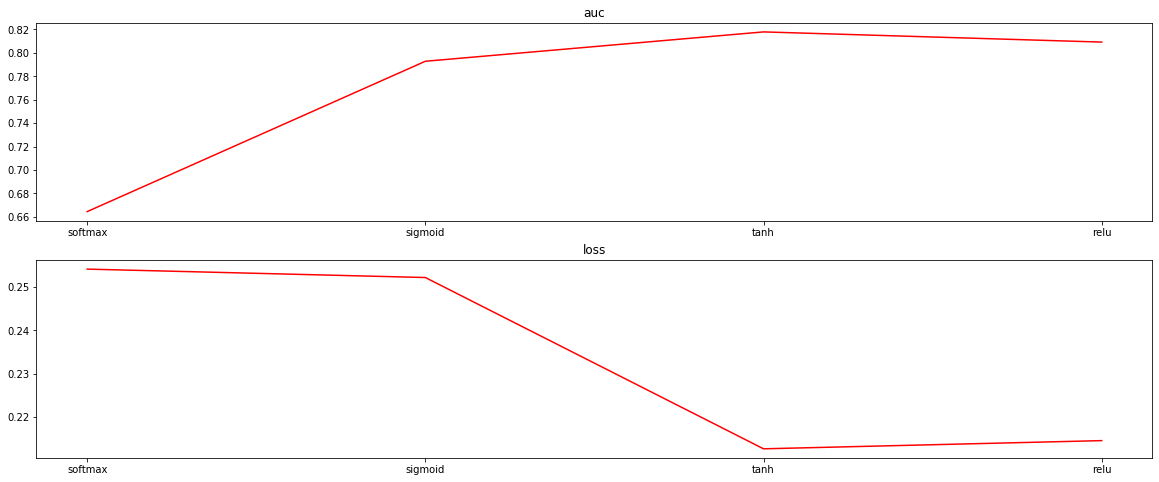

In [6]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [7]:
auc = []
loss = []
epoch = ['softmax', 'sigmoid', 'tanh', 'relu']
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = i,kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 17ms/step - loss: 1.9859 - auc: 0.5017 - val_loss: 1.5551 - val_auc: 0.5589
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.2951 - auc: 0.5107 - val_loss: 1.0454 - val_auc: 0.6400
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.8824 - auc: 0.5167 - val_loss: 0.7478 - val_auc: 0.5986
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6772 - auc: 0.5225 - val_loss: 0.6062 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 13ms/step - loss: 1.7161 - auc: 0.5707 - val_loss: 1.3087 - val_auc: 0.7901
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 1.0806 - auc: 0.7333 - val_loss: 0.8353 - val_auc: 0.8276
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7153 - auc: 0.7712 - val_loss: 0.5682 - val_auc: 0.8392
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5092 - auc: 0.7906 - val_loss: 0.4191 - val

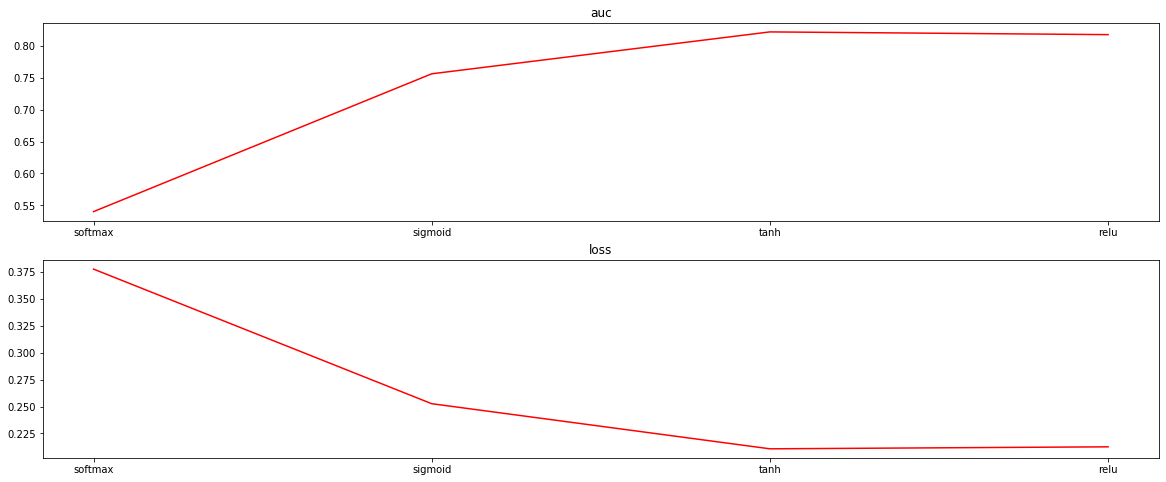

In [8]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [9]:
auc = []
loss = []
epoch = np.arange(0.00001, 0.00106, 0.00005)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 17ms/step - loss: 2.3097 - auc: 0.4721 - val_loss: 2.2607 - val_auc: 0.5529
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 2.2423 - auc: 0.4770 - val_loss: 2.1995 - val_auc: 0.5591
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 2.1892 - auc: 0.4816 - val_loss: 2.1512 - val_auc: 0.5695
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 2.1475 - auc: 0.4862 - val_loss: 2.1129 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 19ms/step - loss: 2.0670 - auc: 0.5050 - val_loss: 1.9190 - val_auc: 0.6438
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 1.8880 - auc: 0.5853 - val_loss: 1.7965 - val_auc: 0.7123
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 1.7665 - auc: 0.6505 - val_loss: 1.6788 - val_auc: 0.7539
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 1.6507 - auc: 0.6884 - val_loss: 1.5666 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 20ms/step - loss: 1.9909 - auc: 0.5301 - val_loss: 1.8083 - val_auc: 0.6998
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 1.7284 - auc: 0.6592 - val_loss: 1.5881 - val_auc: 0.7783
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 1.5161 - auc: 0.7201 - val_loss: 1.3891 - val_auc: 0.8095
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 1.3282 - auc: 0.7510 - val_loss: 1.2149 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 1.9333 - auc: 0.5521 - val_loss: 1.7043 - val_auc: 0.7508
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.5815 - auc: 0.6993 - val_loss: 1.4013 - val_auc: 0.8099
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 1.3014 - auc: 0.7507 - val_loss: 1.1512 - val_auc: 0.8284
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 1.0735 - auc: 0.7759 - val_loss: 0.9498 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 24ms/step - loss: 1.8808 - auc: 0.5655 - val_loss: 1.6102 - val_auc: 0.7824
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 1.4470 - auc: 0.7222 - val_loss: 1.2388 - val_auc: 0.8239
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 1.1200 - auc: 0.7673 - val_loss: 0.9593 - val_auc: 0.8371
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8758 - auc: 0.7880 - val_loss: 0.7534 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 16ms/step - loss: 1.8316 - auc: 0.5742 - val_loss: 1.5185 - val_auc: 0.8005
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.3242 - auc: 0.7391 - val_loss: 1.0957 - val_auc: 0.8326
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.9679 - auc: 0.7777 - val_loss: 0.8046 - val_auc: 0.8425
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7237 - auc: 0.7961 - val_loss: 0.6084 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 1.7846 - auc: 0.5797 - val_loss: 1.4265 - val_auc: 0.8090
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 1.2130 - auc: 0.7507 - val_loss: 0.9697 - val_auc: 0.8361
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.8410 - auc: 0.7846 - val_loss: 0.6811 - val_auc: 0.8456
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6076 - auc: 0.8004 - val_loss: 0.5029 - val

0.8223866454305357 0.00101
[0.46315094453740857, 0.6573294893248119, 0.7297393197717787, 0.7592629180863291, 0.7749702626963166, 0.784640430636479, 0.7913711417108525, 0.7967520816112578, 0.8008467571218322, 0.8041128203060423, 0.8070200197576662, 0.8093234007378884, 0.8113626741396341, 0.8133223120501604, 0.8149230862281002, 0.8164875708151046, 0.8179351222757605, 0.8192092901352794, 0.8203483800729824, 0.8214259793149332, 0.8223866454305357]
0.21075855046739903 0.00101
[0.2830793096525834, 0.24273975242105916, 0.2323688878170496, 0.22619577195903895, 0.22221986260474094, 0.2195291494026408, 0.21764525890227648, 0.2163027371938866, 0.21532373346585187, 0.214571029797582, 0.21395196311359188, 0.2134174087640657, 0.2129456584870686, 0.21252743635492463, 0.21215785605448, 0.21183319763394043, 0.21154988492888588, 0.21130430579678955, 0.21109285668870742, 0.21091205359126805, 0.21075855046739903]


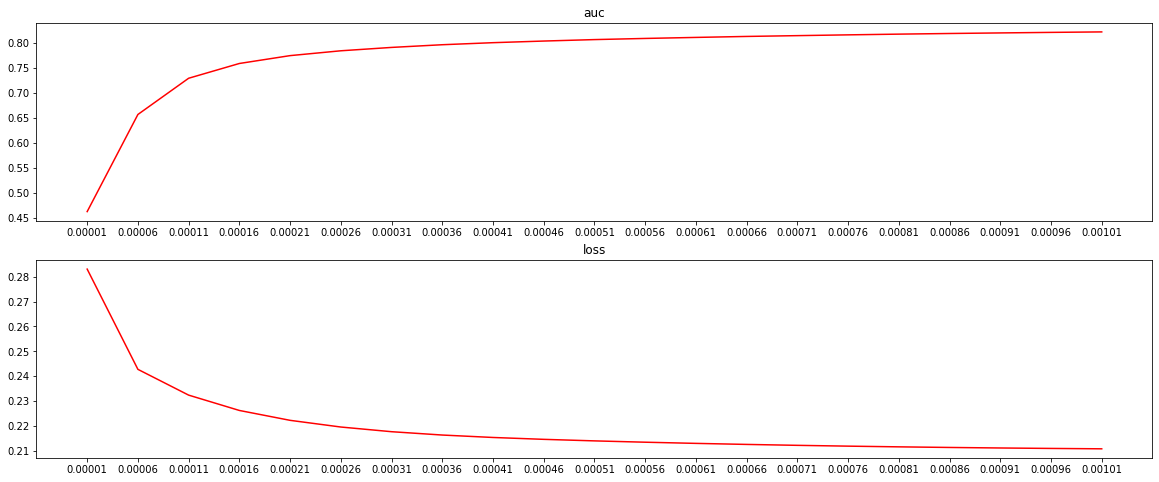

In [11]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [12]:
auc = []
loss = []
epoch = np.arange(0.001, 0.0012, 0.00001)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 17ms/step - loss: 1.7574 - auc: 0.5870 - val_loss: 1.3732 - val_auc: 0.8131
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 1.1517 - auc: 0.7554 - val_loss: 0.9026 - val_auc: 0.8398
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7755 - auc: 0.7873 - val_loss: 0.6198 - val_auc: 0.8467
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5519 - auc: 0.8020 - val_loss: 0.4542 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 17ms/step - loss: 1.7485 - auc: 0.5882 - val_loss: 1.3559 - val_auc: 0.8137
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1321 - auc: 0.7554 - val_loss: 0.8816 - val_auc: 0.8404
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.7553 - auc: 0.7882 - val_loss: 0.6013 - val_auc: 0.8458
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5354 - auc: 0.8027 - val_loss: 0.4400 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 27ms/step - loss: 1.7396 - auc: 0.5892 - val_loss: 1.3390 - val_auc: 0.8126
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1129 - auc: 0.7558 - val_loss: 0.8613 - val_auc: 0.8398
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.7359 - auc: 0.7892 - val_loss: 0.5836 - val_auc: 0.8458
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.5197 - auc: 0.8034 - val_loss: 0.4268 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 13ms/step - loss: 1.7309 - auc: 0.5905 - val_loss: 1.3223 - val_auc: 0.8177
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.0942 - auc: 0.7571 - val_loss: 0.8417 - val_auc: 0.8402
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7172 - auc: 0.7897 - val_loss: 0.5667 - val_auc: 0.8463
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5050 - auc: 0.8033 - val_loss: 0.4144 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 38ms/step - loss: 1.7222 - auc: 0.5928 - val_loss: 1.3059 - val_auc: 0.8131
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 1.0758 - auc: 0.7575 - val_loss: 0.8226 - val_auc: 0.8405
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6992 - auc: 0.7909 - val_loss: 0.5506 - val_auc: 0.8459
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4911 - auc: 0.8028 - val_loss: 0.4028 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 34ms/step - loss: 1.7136 - auc: 0.5925 - val_loss: 1.2898 - val_auc: 0.8163
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.0579 - auc: 0.7590 - val_loss: 0.8042 - val_auc: 0.8415
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6820 - auc: 0.7914 - val_loss: 0.5353 - val_auc: 0.8467
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4779 - auc: 0.8028 - val_loss: 0.3920 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 18ms/step - loss: 1.7051 - auc: 0.5943 - val_loss: 1.2740 - val_auc: 0.8181
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 1.0404 - auc: 0.7602 - val_loss: 0.7863 - val_auc: 0.8418
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.6654 - auc: 0.7920 - val_loss: 0.5208 - val_auc: 0.8469
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4655 - auc: 0.8029 - val_loss: 0.3819 - val

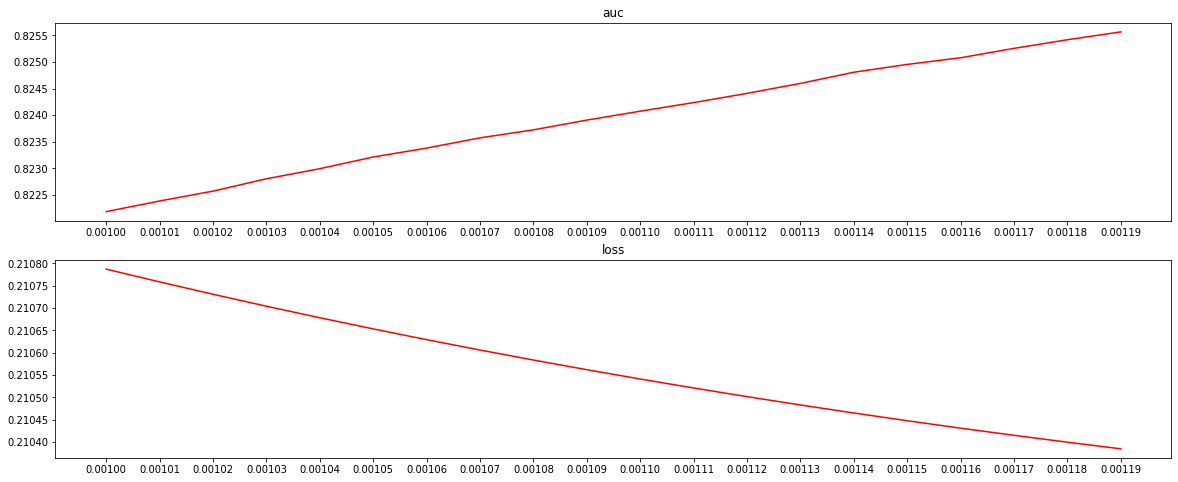

In [13]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [14]:
auc = []
loss = []
epoch = np.arange(0.0012, 0.0015, 0.00001)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 13ms/step - loss: 1.6994 - auc: 0.5955 - val_loss: 1.2636 - val_auc: 0.8201
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.0289 - auc: 0.7602 - val_loss: 0.7747 - val_auc: 0.8411
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6547 - auc: 0.7924 - val_loss: 0.5115 - val_auc: 0.8470
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4577 - auc: 0.8030 - val_loss: 0.3755 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 18ms/step - loss: 1.6911 - auc: 0.5972 - val_loss: 1.2483 - val_auc: 0.8175
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 1.0120 - auc: 0.7609 - val_loss: 0.7578 - val_auc: 0.8417
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.6392 - auc: 0.7926 - val_loss: 0.4981 - val_auc: 0.8473
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4464 - auc: 0.8026 - val_loss: 0.3665 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 1.6828 - auc: 0.5981 - val_loss: 1.2332 - val_auc: 0.8175
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.9955 - auc: 0.7618 - val_loss: 0.7413 - val_auc: 0.8424
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.6243 - auc: 0.7926 - val_loss: 0.4854 - val_auc: 0.8481
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4358 - auc: 0.8029 - val_loss: 0.3580 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 1.6746 - auc: 0.5986 - val_loss: 1.2184 - val_auc: 0.8206
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.9793 - auc: 0.7616 - val_loss: 0.7254 - val_auc: 0.8434
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6100 - auc: 0.7922 - val_loss: 0.4733 - val_auc: 0.8486
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4258 - auc: 0.8030 - val_loss: 0.3502 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 18ms/step - loss: 1.6665 - auc: 0.5992 - val_loss: 1.2038 - val_auc: 0.8193
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.9635 - auc: 0.7640 - val_loss: 0.7099 - val_auc: 0.8442
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.5963 - auc: 0.7916 - val_loss: 0.4618 - val_auc: 0.8487
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4164 - auc: 0.8029 - val_loss: 0.3428 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.6584 - auc: 0.6000 - val_loss: 1.1895 - val_auc: 0.8204
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9480 - auc: 0.7643 - val_loss: 0.6949 - val_auc: 0.8441
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5831 - auc: 0.7919 - val_loss: 0.4509 - val_auc: 0.8489
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4075 - auc: 0.8026 - val_loss: 0.3359 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 1.6505 - auc: 0.6012 - val_loss: 1.1753 - val_auc: 0.8200
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9329 - auc: 0.7644 - val_loss: 0.6803 - val_auc: 0.8449
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5705 - auc: 0.7921 - val_loss: 0.4405 - val_auc: 0.8488
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3991 - auc: 0.8029 - val_loss: 0.3295 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.6426 - auc: 0.6016 - val_loss: 1.1614 - val_auc: 0.8205
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9182 - auc: 0.7655 - val_loss: 0.6661 - val_auc: 0.8442
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5584 - auc: 0.7918 - val_loss: 0.4306 - val_auc: 0.8486
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3912 - auc: 0.8031 - val_loss: 0.3235 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 1.6348 - auc: 0.6026 - val_loss: 1.1478 - val_auc: 0.8206
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.9038 - auc: 0.7671 - val_loss: 0.6523 - val_auc: 0.8444
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5468 - auc: 0.7917 - val_loss: 0.4213 - val_auc: 0.8492
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3838 - auc: 0.8030 - val_loss: 0.3179 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 18ms/step - loss: 1.6271 - auc: 0.6030 - val_loss: 1.1343 - val_auc: 0.8218
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.8897 - auc: 0.7679 - val_loss: 0.6390 - val_auc: 0.8440
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5357 - auc: 0.7916 - val_loss: 0.4123 - val_auc: 0.8494
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3768 - auc: 0.8027 - val_loss: 0.3126 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 20ms/step - loss: 1.6195 - auc: 0.6041 - val_loss: 1.1211 - val_auc: 0.8225
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.8759 - auc: 0.7685 - val_loss: 0.6261 - val_auc: 0.8448
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.5250 - auc: 0.7913 - val_loss: 0.4039 - val_auc: 0.8494
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3702 - auc: 0.8028 - val_loss: 0.3077 - val

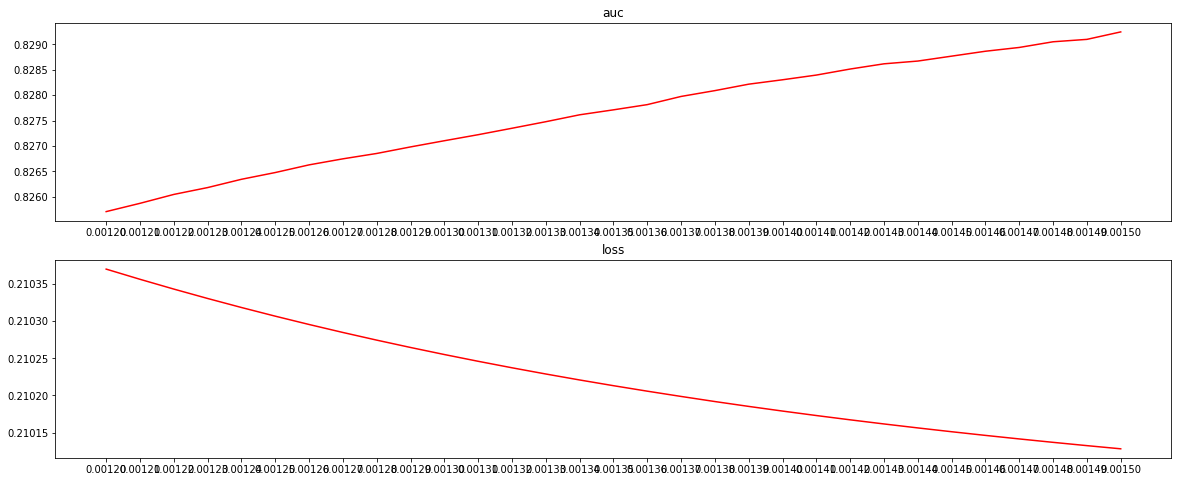

In [15]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [16]:
auc = []
loss = []
epoch = np.arange(0.0015, 0.0018, 0.00001)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.6195 - auc: 0.6041 - val_loss: 1.1211 - val_auc: 0.8225
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.8759 - auc: 0.7685 - val_loss: 0.6261 - val_auc: 0.8448
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5250 - auc: 0.7913 - val_loss: 0.4039 - val_auc: 0.8494
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3702 - auc: 0.8028 - val_loss: 0.3077 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 16ms/step - loss: 1.6120 - auc: 0.6042 - val_loss: 1.1081 - val_auc: 0.8227
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8625 - auc: 0.7694 - val_loss: 0.6135 - val_auc: 0.8444
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5148 - auc: 0.7911 - val_loss: 0.3958 - val_auc: 0.8496
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3640 - auc: 0.8024 - val_loss: 0.3032 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 13ms/step - loss: 1.6045 - auc: 0.6050 - val_loss: 1.0953 - val_auc: 0.8229
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.8494 - auc: 0.7700 - val_loss: 0.6014 - val_auc: 0.8459
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5050 - auc: 0.7912 - val_loss: 0.3881 - val_auc: 0.8499
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3582 - auc: 0.8022 - val_loss: 0.2989 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 10ms/step - loss: 1.5971 - auc: 0.6056 - val_loss: 1.0827 - val_auc: 0.8257
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8366 - auc: 0.7719 - val_loss: 0.5897 - val_auc: 0.8444
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4956 - auc: 0.7914 - val_loss: 0.3808 - val_auc: 0.8499
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3527 - auc: 0.8020 - val_loss: 0.2949 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5898 - auc: 0.6071 - val_loss: 1.0703 - val_auc: 0.8249
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8241 - auc: 0.7720 - val_loss: 0.5783 - val_auc: 0.8439
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4866 - auc: 0.7902 - val_loss: 0.3739 - val_auc: 0.8498
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3475 - auc: 0.8021 - val_loss: 0.2912 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5826 - auc: 0.6077 - val_loss: 1.0581 - val_auc: 0.8285
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8118 - auc: 0.7723 - val_loss: 0.5673 - val_auc: 0.8457
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4779 - auc: 0.7893 - val_loss: 0.3672 - val_auc: 0.8495
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3426 - auc: 0.8012 - val_loss: 0.2877 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5754 - auc: 0.6080 - val_loss: 1.0461 - val_auc: 0.8293
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7999 - auc: 0.7731 - val_loss: 0.5567 - val_auc: 0.8454
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4696 - auc: 0.7896 - val_loss: 0.3609 - val_auc: 0.8500
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3380 - auc: 0.8010 - val_loss: 0.2844 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5683 - auc: 0.6081 - val_loss: 1.0343 - val_auc: 0.8294
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7883 - auc: 0.7738 - val_loss: 0.5465 - val_auc: 0.8451
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4616 - auc: 0.7893 - val_loss: 0.3549 - val_auc: 0.8501
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3337 - auc: 0.7999 - val_loss: 0.2813 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5613 - auc: 0.6081 - val_loss: 1.0228 - val_auc: 0.8296
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7769 - auc: 0.7746 - val_loss: 0.5366 - val_auc: 0.8446
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4540 - auc: 0.7892 - val_loss: 0.3492 - val_auc: 0.8501
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3296 - auc: 0.8007 - val_loss: 0.2784 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 1.5543 - auc: 0.6093 - val_loss: 1.0114 - val_auc: 0.8309
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7658 - auc: 0.7756 - val_loss: 0.5270 - val_auc: 0.8440
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4467 - auc: 0.7892 - val_loss: 0.3437 - val_auc: 0.8495
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3258 - auc: 0.8004 - val_loss: 0.2757 - val

0.8313017882703977 0.0017900000000000008
[0.8292473942057621, 0.8293078768573213, 0.829388520392734, 0.829497389165541, 0.8295659361706417, 0.8296385153525131, 0.8297050462692285, 0.8297796415394851, 0.8298381081026591, 0.8299207677264572, 0.8300175399689522, 0.8301122961230619, 0.8301848753049333, 0.8302755992822726, 0.8303401141106026, 0.8304580552811435, 0.8304973690046572, 0.83054777121429, 0.8306425273683999, 0.830685873268684, 0.8307433317876655, 0.8308098627043808, 0.8308501844720872, 0.8309449406261971, 0.8310074393661417, 0.8310941311667102, 0.8311525977298845, 0.8312150964698293, 0.8312513860607649, 0.8313017882703977]
0.21003305161532945 0.0017900000000000008
[0.21012807771808917, 0.21012392749223174, 0.21011991155075285, 0.21011602046009298, 0.21011223531167358, 0.21010855180583826, 0.2101049618225867, 0.21010146334523302, 0.2100980371392527, 0.21009468924256874, 0.2100913948846298, 0.21008815428284558, 0.21008496662757556, 0.2100818239879153, 0.21007871664750416, 0.2100756

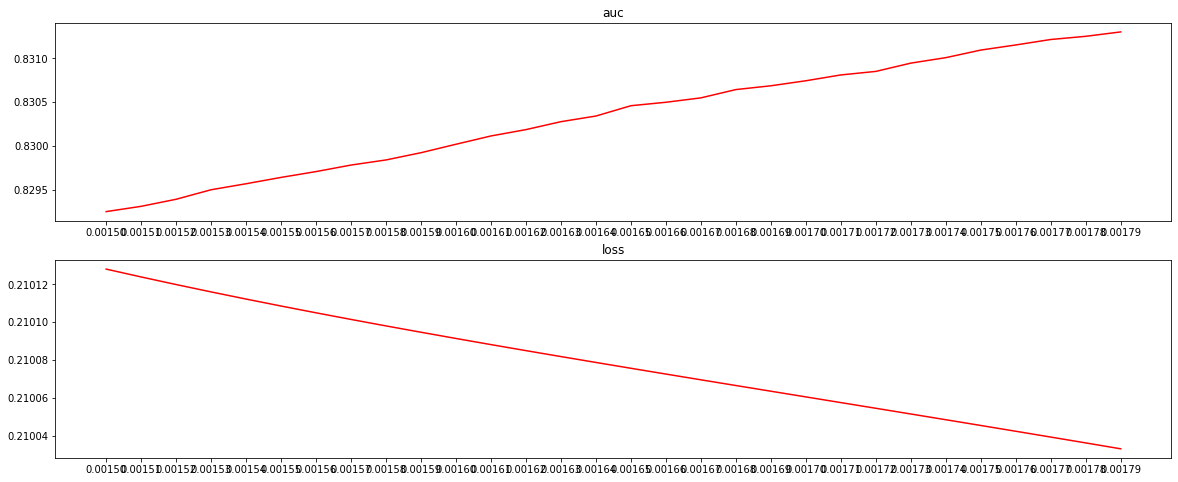

In [17]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [18]:
auc = []
loss = []
epoch = np.arange(0.00179, 0.002, 0.00001)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5497 - auc: 0.6087 - val_loss: 1.0039 - val_auc: 0.8288
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7586 - auc: 0.7755 - val_loss: 0.5208 - val_auc: 0.8452
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4419 - auc: 0.7895 - val_loss: 0.3402 - val_auc: 0.8496
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3233 - auc: 0.7998 - val_loss: 0.2740 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 1.5429 - auc: 0.6094 - val_loss: 0.9928 - val_auc: 0.8284
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7479 - auc: 0.7766 - val_loss: 0.5118 - val_auc: 0.8456
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4351 - auc: 0.7897 - val_loss: 0.3352 - val_auc: 0.8492
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.3198 - auc: 0.7991 - val_loss: 0.2715 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5361 - auc: 0.6101 - val_loss: 0.9820 - val_auc: 0.8281
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7375 - auc: 0.7777 - val_loss: 0.5031 - val_auc: 0.8452
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4285 - auc: 0.7890 - val_loss: 0.3304 - val_auc: 0.8497
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3165 - auc: 0.7983 - val_loss: 0.2692 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 1.5294 - auc: 0.6103 - val_loss: 0.9713 - val_auc: 0.8308
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7274 - auc: 0.7786 - val_loss: 0.4947 - val_auc: 0.8453
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.4222 - auc: 0.7890 - val_loss: 0.3259 - val_auc: 0.8498
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3134 - auc: 0.7981 - val_loss: 0.2671 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 13ms/step - loss: 1.5228 - auc: 0.6094 - val_loss: 0.9608 - val_auc: 0.8320
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7175 - auc: 0.7789 - val_loss: 0.4865 - val_auc: 0.8448
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.4162 - auc: 0.7893 - val_loss: 0.3216 - val_auc: 0.8495
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3105 - auc: 0.7982 - val_loss: 0.2650 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5162 - auc: 0.6096 - val_loss: 0.9504 - val_auc: 0.8328
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7078 - auc: 0.7793 - val_loss: 0.4787 - val_auc: 0.8456
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4104 - auc: 0.7889 - val_loss: 0.3174 - val_auc: 0.8503
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3077 - auc: 0.7978 - val_loss: 0.2631 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 1.5097 - auc: 0.6106 - val_loss: 0.9403 - val_auc: 0.8334
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6984 - auc: 0.7797 - val_loss: 0.4711 - val_auc: 0.8448
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4048 - auc: 0.7895 - val_loss: 0.3135 - val_auc: 0.8502
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3051 - auc: 0.7979 - val_loss: 0.2612 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.5032 - auc: 0.6111 - val_loss: 0.9303 - val_auc: 0.8345
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6892 - auc: 0.7797 - val_loss: 0.4638 - val_auc: 0.8449
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3995 - auc: 0.7891 - val_loss: 0.3098 - val_auc: 0.8500
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3027 - auc: 0.7977 - val_loss: 0.2595 - val

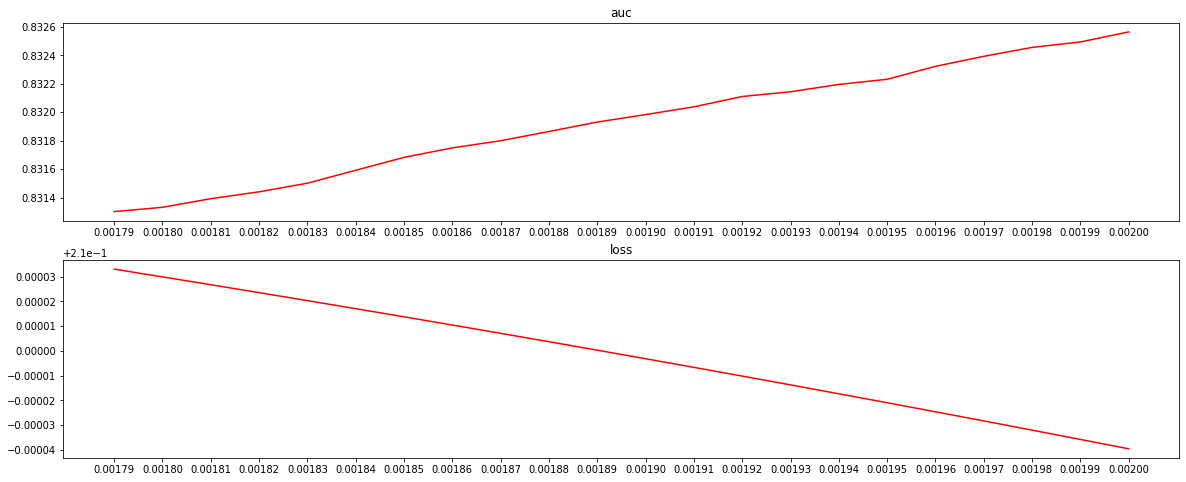

In [19]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [20]:
auc = []
loss = []
epoch = np.arange(0.002, 0.005, 0.0005)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 1.5032 - auc: 0.6111 - val_loss: 0.9303 - val_auc: 0.8345
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6892 - auc: 0.7797 - val_loss: 0.4638 - val_auc: 0.8449
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3995 - auc: 0.7891 - val_loss: 0.3098 - val_auc: 0.8500
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3027 - auc: 0.7977 - val_loss: 0.2595 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 1.2436 - auc: 0.6082 - val_loss: 0.5756 - val_auc: 0.8371
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4190 - auc: 0.7623 - val_loss: 0.2872 - val_auc: 0.8463
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2838 - auc: 0.7831 - val_loss: 0.2393 - val_auc: 0.8507
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2583 - auc: 0.7909 - val_loss: 0.2286 - val

0.8353601741900365 0.0045000000000000005
[0.8325638595996049, 0.8341384246285357, 0.8340597971815084, 0.834787605088607, 0.8341041511259855, 0.8353601741900365]
0.2095337267452733 0.003
[0.2099603839303558, 0.20968199021631592, 0.2095337267452733, 0.20995622604358652, 0.212551545751845, 0.21267789198369477]


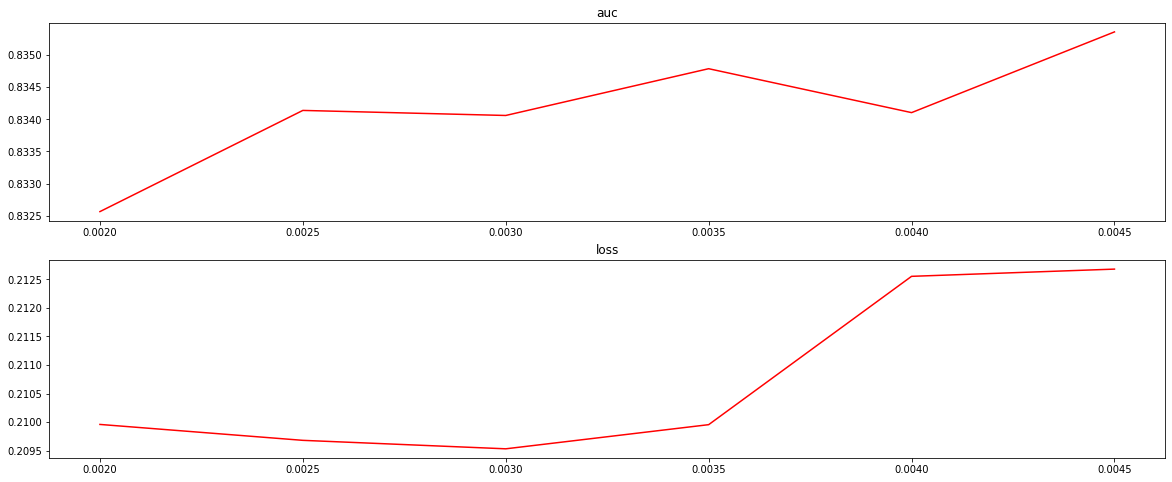

In [21]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [22]:
auc = []
loss = []
epoch = np.arange(0.005, 0.01, 0.0005)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 20ms/step - loss: 1.0705 - auc: 0.6300 - val_loss: 0.4036 - val_auc: 0.8317
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.3273 - auc: 0.7503 - val_loss: 0.2472 - val_auc: 0.8441
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2611 - auc: 0.7810 - val_loss: 0.2316 - val_auc: 0.8509
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2499 - auc: 0.7977 - val_loss: 0.2278 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 0.9536 - auc: 0.6612 - val_loss: 0.3294 - val_auc: 0.8342
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2887 - auc: 0.7782 - val_loss: 0.2378 - val_auc: 0.8462
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2544 - auc: 0.7844 - val_loss: 0.2299 - val_auc: 0.8527
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2491 - auc: 0.7929 - val_loss: 0.2282 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 17ms/step - loss: 0.8864 - auc: 0.6762 - val_loss: 0.2971 - val_auc: 0.8386
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2774 - auc: 0.7678 - val_loss: 0.2329 - val_auc: 0.8479
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2544 - auc: 0.7707 - val_loss: 0.2284 - val_auc: 0.8511
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2506 - auc: 0.7779 - val_loss: 0.2277 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 19ms/step - loss: 0.8595 - auc: 0.6504 - val_loss: 0.2885 - val_auc: 0.8298
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2722 - auc: 0.7722 - val_loss: 0.2302 - val_auc: 0.8512
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2550 - auc: 0.7627 - val_loss: 0.2275 - val_auc: 0.8505
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2508 - auc: 0.7753 - val_loss: 0.2254 - val

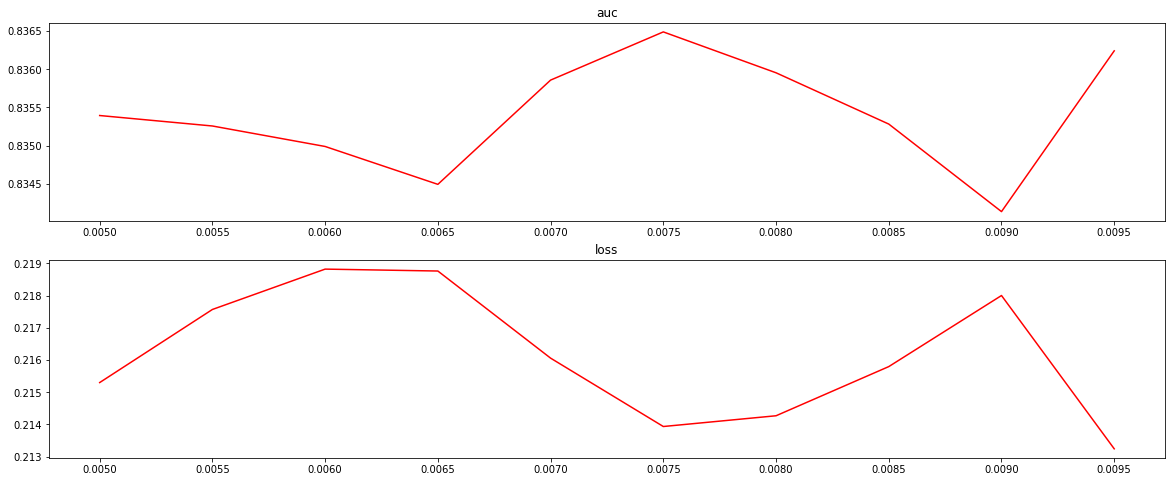

In [23]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [24]:
auc = []
loss = []
epoch = np.arange(0.007, 0.008, 0.0001)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 17ms/step - loss: 0.9261 - auc: 0.6704 - val_loss: 0.3138 - val_auc: 0.8369
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2836 - auc: 0.7740 - val_loss: 0.2363 - val_auc: 0.8488
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2543 - auc: 0.7793 - val_loss: 0.2297 - val_auc: 0.8532
Epoch 4/10
38/38 [==============================] - ETA: 0s - loss: 0.2512 - auc: 0.788 - 0s 5ms/step - loss: 0.2491 

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 16ms/step - loss: 0.9122 - auc: 0.6742 - val_loss: 0.3071 - val_auc: 0.8414
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2813 - auc: 0.7715 - val_loss: 0.2351 - val_auc: 0.8488
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2543 - auc: 0.7752 - val_loss: 0.2296 - val_auc: 0.8532
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2493 - auc: 0.7876 - val_loss: 0.2278 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 0.9000 - auc: 0.6753 - val_loss: 0.3020 - val_auc: 0.8408
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2795 - auc: 0.7700 - val_loss: 0.2340 - val_auc: 0.8509
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2543 - auc: 0.7731 - val_loss: 0.2293 - val_auc: 0.8533
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2497 - auc: 0.7840 - val_loss: 0.2275 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 0.8895 - auc: 0.6760 - val_loss: 0.2981 - val_auc: 0.8378
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2779 - auc: 0.7681 - val_loss: 0.2331 - val_auc: 0.8490
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2544 - auc: 0.7717 - val_loss: 0.2287 - val_auc: 0.8525
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2504 - auc: 0.7794 - val_loss: 0.2276 - val

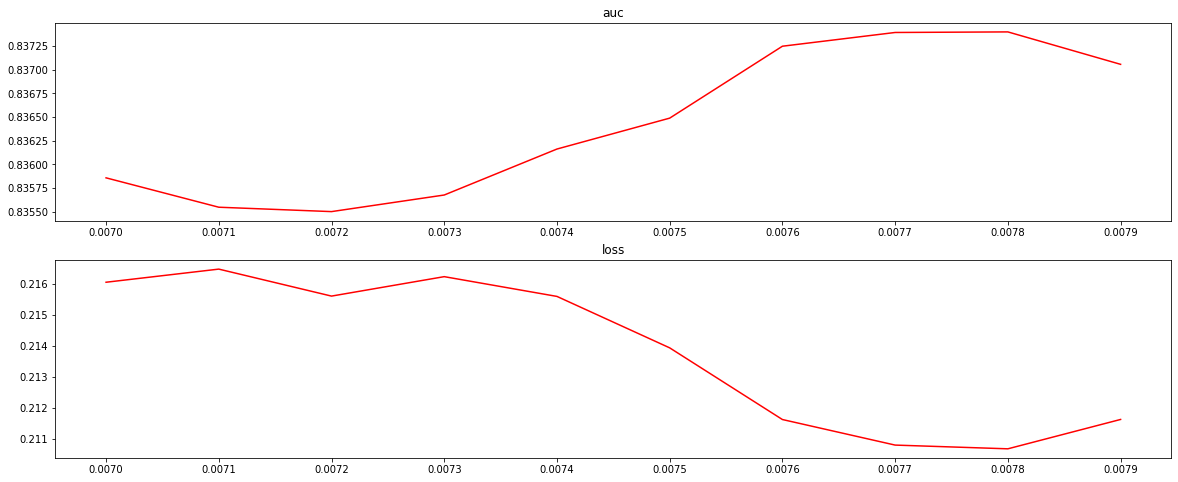

In [25]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [26]:
auc = []
loss = []
epoch = np.arange(0.0077, 0.0079, 0.00001)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=i, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 0.8964 - auc: 0.6759 - val_loss: 0.3005 - val_auc: 0.8397
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2789 - auc: 0.7693 - val_loss: 0.2337 - val_auc: 0.8504
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2543 - auc: 0.7730 - val_loss: 0.2292 - val_auc: 0.8549
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2500 - auc: 0.7824 - val_loss: 0.2275 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 0.8953 - auc: 0.6761 - val_loss: 0.3001 - val_auc: 0.8391
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2787 - auc: 0.7693 - val_loss: 0.2336 - val_auc: 0.8501
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2543 - auc: 0.7728 - val_loss: 0.2291 - val_auc: 0.8549
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2500 - auc: 0.7822 - val_loss: 0.2275 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 0.8942 - auc: 0.6761 - val_loss: 0.2998 - val_auc: 0.8394
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2786 - auc: 0.7688 - val_loss: 0.2335 - val_auc: 0.8503
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2543 - auc: 0.7728 - val_loss: 0.2290 - val_auc: 0.8552
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2501 - auc: 0.7820 - val_loss: 0.2275 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 13ms/step - loss: 0.8932 - auc: 0.6757 - val_loss: 0.2994 - val_auc: 0.8399
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2784 - auc: 0.7686 - val_loss: 0.2334 - val_auc: 0.8501
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2544 - auc: 0.7726 - val_loss: 0.2290 - val_auc: 0.8543
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2501 - auc: 0.7812 - val_loss: 0.2276 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 0.8922 - auc: 0.6758 - val_loss: 0.2990 - val_auc: 0.8387
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2783 - auc: 0.7686 - val_loss: 0.2333 - val_auc: 0.8495
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2544 - auc: 0.7721 - val_loss: 0.2289 - val_auc: 0.8532
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2502 - auc: 0.7811 - val_loss: 0.2276 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 0.8912 - auc: 0.6763 - val_loss: 0.2987 - val_auc: 0.8387
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2781 - auc: 0.7684 - val_loss: 0.2332 - val_auc: 0.8492
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2544 - auc: 0.7722 - val_loss: 0.2288 - val_auc: 0.8527
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2503 - auc: 0.7805 - val_loss: 0.2276 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 17ms/step - loss: 0.8902 - auc: 0.6761 - val_loss: 0.2983 - val_auc: 0.8387
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2780 - auc: 0.7681 - val_loss: 0.2332 - val_auc: 0.8489
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2544 - auc: 0.7719 - val_loss: 0.2287 - val_auc: 0.8522
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2503 - auc: 0.7801 - val_loss: 0.2276 - val

0.8374528739339931 0.007729999999999999
[0.8373944073708193, 0.8374367452269107, 0.8374427934920667, 0.8374528739339931, 0.8374367452269108, 0.837438761315296, 0.8374407774036814, 0.8374266647849842, 0.8374306969617548, 0.837406503901131, 0.837400455635975, 0.8373843269288926, 0.8373843269288925, 0.8373520695147275, 0.8373157799237918, 0.8372925949073609, 0.8372613455373883, 0.8372210237696822, 0.8371383641458842, 0.8371081228201045, 0.8370577206104716]
0.210658554029201 0.007769999999999997
[0.21079147437002901, 0.21071618548997212, 0.2106815936600697, 0.21066893001096784, 0.21066404739950947, 0.21066139448181986, 0.21065958099519963, 0.210658554029201, 0.21065882031667277, 0.21066191475036197, 0.21067087416049365, 0.21069037393133222, 0.21072563029747488, 0.21078001982807154, 0.21085320330260998, 0.2109421039400592, 0.2110443900444134, 0.21116061472420594, 0.21129355070538822, 0.21144618361431955, 0.21162101071917122]


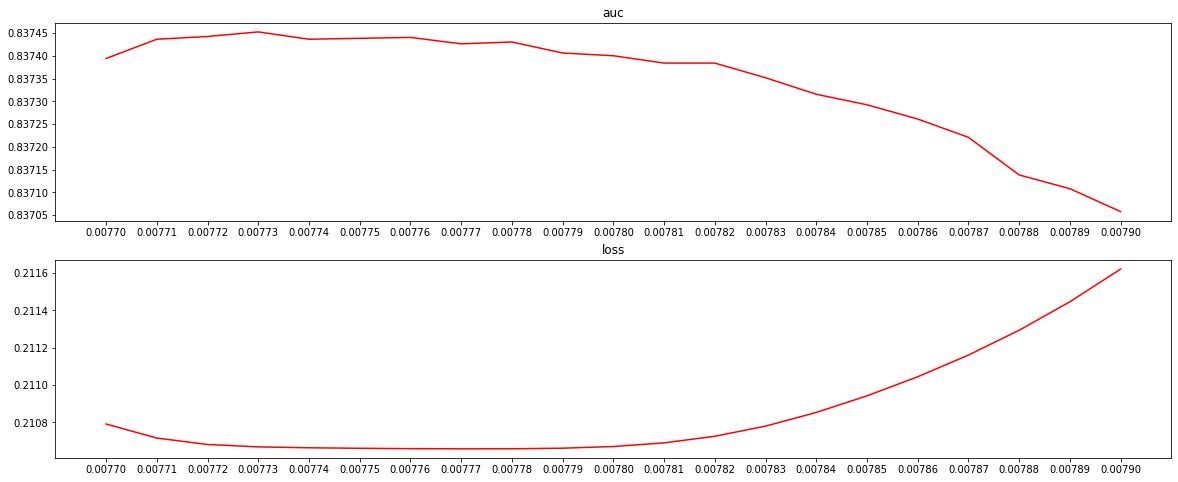

In [27]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [28]:
auc = []
loss = []
epoch = np.arange(0, 1, 0.1)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(i, seed = 0),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 0.8953 - auc: 0.6761 - val_loss: 0.3001 - val_auc: 0.8391
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2787 - auc: 0.7693 - val_loss: 0.2336 - val_auc: 0.8501
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2543 - auc: 0.7728 - val_loss: 0.2291 - val_auc: 0.8549
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2500 - auc: 0.7822 - val_loss: 0.2275 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 0.9012 - auc: 0.6602 - val_loss: 0.3033 - val_auc: 0.8359
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2816 - auc: 0.7563 - val_loss: 0.2344 - val_auc: 0.8496
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2569 - auc: 0.7632 - val_loss: 0.2309 - val_auc: 0.8522
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2527 - auc: 0.7716 - val_loss: 0.2309 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 16ms/step - loss: 0.8832 - auc: 0.6289 - val_loss: 0.2979 - val_auc: 0.8279
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2822 - auc: 0.7409 - val_loss: 0.2381 - val_auc: 0.8477
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2615 - auc: 0.7504 - val_loss: 0.2315 - val_auc: 0.8564
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2573 - auc: 0.7590 - val_loss: 0.2304 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 0.8922 - auc: 0.5227 - val_loss: 0.3085 - val_auc: 0.7758
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.3031 - auc: 0.5972 - val_loss: 0.2494 - val_auc: 0.8184
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2819 - auc: 0.6131 - val_loss: 0.2461 - val_auc: 0.8376
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2708 - auc: 0.6546 - val_loss: 0.2450 - val

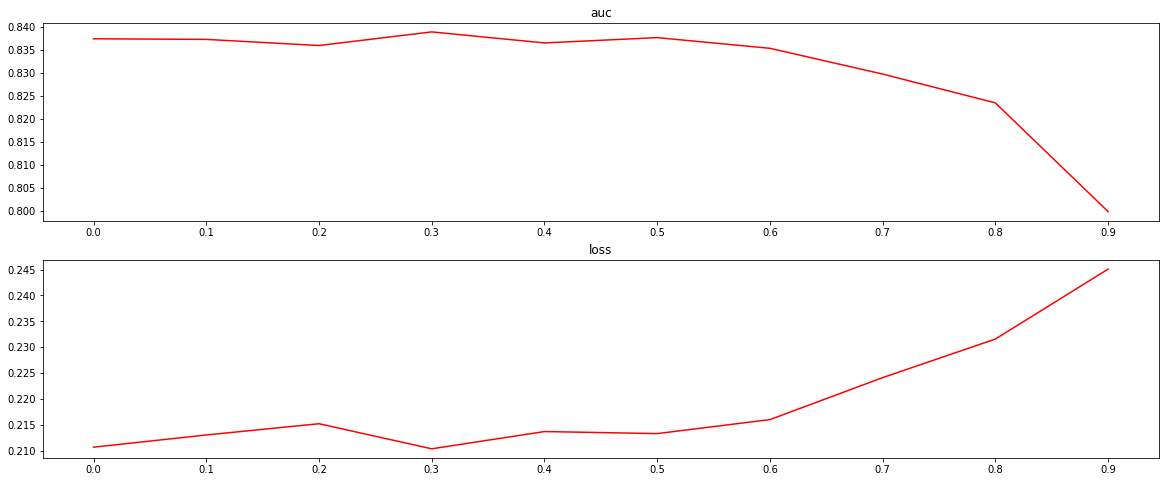

In [29]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color =
           'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [32]:
auc = []
loss = []
epoch = np.arange(0, 1, 0.1)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(i, seed = 0),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 0.9012 - auc: 0.6602 - val_loss: 0.3033 - val_auc: 0.8359
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2816 - auc: 0.7563 - val_loss: 0.2344 - val_auc: 0.8496
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2569 - auc: 0.7632 - val_loss: 0.2309 - val_auc: 0.8522
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2527 - auc: 0.7716 - val_loss: 0.2309 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 0.9100 - auc: 0.6534 - val_loss: 0.3084 - val_auc: 0.8360
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2858 - auc: 0.7506 - val_loss: 0.2360 - val_auc: 0.8479
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2597 - auc: 0.7569 - val_loss: 0.2324 - val_auc: 0.8541
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2535 - auc: 0.7703 - val_loss: 0.2294 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 13ms/step - loss: 0.9267 - auc: 0.6337 - val_loss: 0.3146 - val_auc: 0.8400
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2952 - auc: 0.7272 - val_loss: 0.2410 - val_auc: 0.8469
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2630 - auc: 0.7528 - val_loss: 0.2357 - val_auc: 0.8519
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2568 - auc: 0.7644 - val_loss: 0.2298 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 13ms/step - loss: 1.0452 - auc: 0.5937 - val_loss: 0.3782 - val_auc: 0.8408
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.3370 - auc: 0.7175 - val_loss: 0.2549 - val_auc: 0.8485
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2862 - auc: 0.7162 - val_loss: 0.2422 - val_auc: 0.8540
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2730 - auc: 0.7386 - val_loss: 0.2375 - val

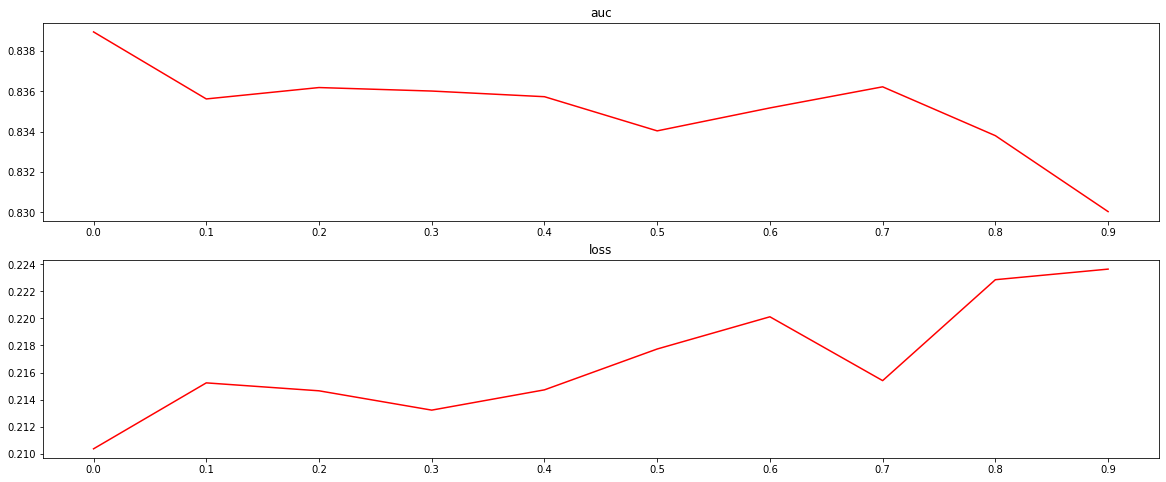

In [33]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [34]:
auc = []
loss = []
epoch = np.arange(8, 150, 8)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(i, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 0.3916 - auc: 0.5503 - val_loss: 0.2596 - val_auc: 0.8246
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2629 - auc: 0.7409 - val_loss: 0.2274 - val_auc: 0.8486
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2502 - auc: 0.7812 - val_loss: 0.2250 - val_auc: 0.8517
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2472 - auc: 0.8000 - val_loss: 0.2249 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 0.7777 - auc: 0.5752 - val_loss: 0.3910 - val_auc: 0.8346
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3276 - auc: 0.7608 - val_loss: 0.2542 - val_auc: 0.8498
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2666 - auc: 0.7836 - val_loss: 0.2318 - val_auc: 0.8507
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2520 - auc: 0.7967 - val_loss: 0.2278 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 0.6894 - auc: 0.6529 - val_loss: 0.2784 - val_auc: 0.8428
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2687 - auc: 0.7697 - val_loss: 0.2336 - val_auc: 0.8505
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2518 - auc: 0.7803 - val_loss: 0.2283 - val_auc: 0.8535
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2491 - auc: 0.7871 - val_loss: 0.2296 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 0.8118 - auc: 0.6626 - val_loss: 0.3047 - val_auc: 0.8436
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2825 - auc: 0.7701 - val_loss: 0.2366 - val_auc: 0.8506
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2567 - auc: 0.7739 - val_loss: 0.2313 - val_auc: 0.8524
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2523 - auc: 0.7774 - val_loss: 0.2285 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 0.8996 - auc: 0.6615 - val_loss: 0.3206 - val_auc: 0.8428
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2889 - auc: 0.7693 - val_loss: 0.2385 - val_auc: 0.8493
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2571 - auc: 0.7720 - val_loss: 0.2299 - val_auc: 0.8519
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2508 - auc: 0.7879 - val_loss: 0.2276 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 14ms/step - loss: 0.9012 - auc: 0.6602 - val_loss: 0.3033 - val_auc: 0.8359
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2816 - auc: 0.7563 - val_loss: 0.2344 - val_auc: 0.8496
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2569 - auc: 0.7632 - val_loss: 0.2309 - val_auc: 0.8522
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2527 - auc: 0.7716 - val_loss: 0.2309 - val

0.8389467954275115 128
[0.8384145480937885, 0.836029515533961, 0.8338864135803713, 0.8348662325356343, 0.8321404810386889, 0.833852140077821, 0.8353682385435778, 0.832936835950888, 0.8351021148767163, 0.8326868409911091, 0.834908570391726, 0.8340295558557287, 0.8342855990806636, 0.8314005766012781, 0.8371464284994254, 0.8389467954275115, 0.8344327735327918, 0.8361948347815568]
0.210353494775854 128
[0.2142837232931332, 0.21426912682981022, 0.22084793621061388, 0.21908467518818947, 0.2193089101758155, 0.22093809978214676, 0.22214016840273093, 0.2194401587154332, 0.21499584919974946, 0.22232850129812837, 0.2199268177983567, 0.22301019674893086, 0.22342588001854752, 0.2250165040448033, 0.21221382944995335, 0.210353494775854, 0.21763006031683096, 0.21357172674968317]


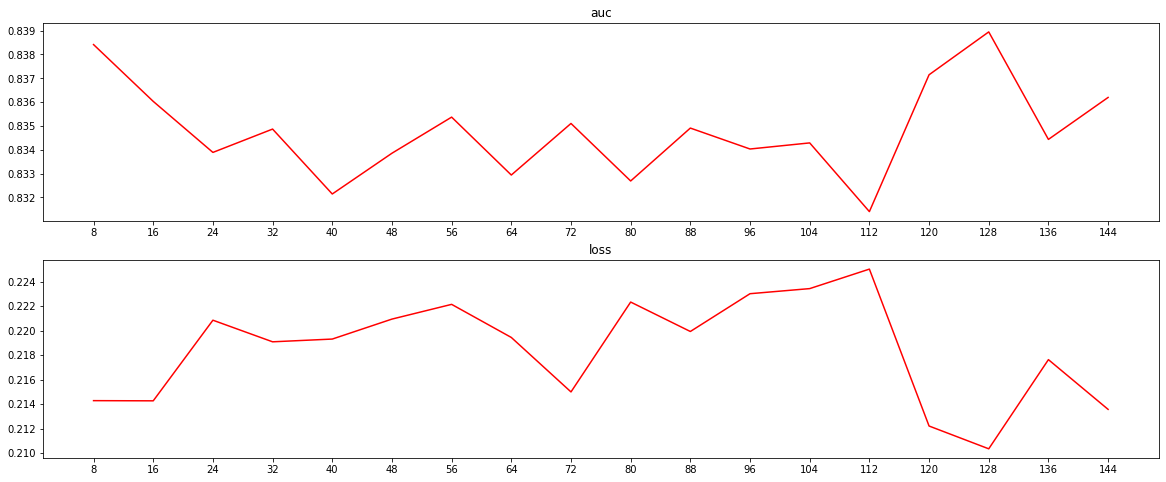

In [35]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'red')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [36]:
auc = []
loss = []
epoch = np.arange(1, 150, 10)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(i, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 2s 43ms/step - loss: 0.5249 - auc: 0.4939 - val_loss: 0.3344 - val_auc: 0.5070
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3221 - auc: 0.5513 - val_loss: 0.2877 - val_auc: 0.7076
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2986 - auc: 0.6755 - val_loss: 0.2743 - val_auc: 0.8340
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2886 - auc: 0.7576 - val_loss: 0.2659 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 28ms/step - loss: 0.7406 - auc: 0.5603 - val_loss: 0.3494 - val_auc: 0.8245
Epoch 2/10
38/38 [==============================] - 1s 23ms/step - loss: 0.3111 - auc: 0.7257 - val_loss: 0.2534 - val_auc: 0.8413
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2655 - auc: 0.7726 - val_loss: 0.2386 - val_auc: 0.8479
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2564 - auc: 0.7837 - val_loss: 0.2337 - va

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 29ms/step - loss: 0.8118 - auc: 0.6237 - val_loss: 0.3325 - val_auc: 0.8228
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2954 - auc: 0.7426 - val_loss: 0.2451 - val_auc: 0.8443
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2589 - auc: 0.7759 - val_loss: 0.2329 - val_auc: 0.8531
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2543 - auc: 0.7727 - val_loss: 0.2311 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 26ms/step - loss: 0.9360 - auc: 0.6488 - val_loss: 0.3581 - val_auc: 0.8372
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3064 - auc: 0.7620 - val_loss: 0.2457 - val_auc: 0.8473
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2611 - auc: 0.7725 - val_loss: 0.2342 - val_auc: 0.8495
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2530 - auc: 0.7823 - val_loss: 0.2299 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 30ms/step - loss: 1.0143 - auc: 0.6486 - val_loss: 0.3697 - val_auc: 0.8403
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3093 - auc: 0.7679 - val_loss: 0.2466 - val_auc: 0.8454
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2608 - auc: 0.7725 - val_loss: 0.2331 - val_auc: 0.8499
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.2536 - auc: 0.7767 - val_loss: 0.2286 - va

dense_725 (Dense)            (None, 1)                 142       
Total params: 22,171
Trainable params: 22,171
Non-trainable params: 0
_________________________________________________________________
0.8356928287736135 141
[0.826949053446503, 0.8285074897683514, 0.8315800084675713, 0.8312695308562328, 0.8323703151146146, 0.8353238845991009, 0.8338037539565735, 0.8338057700449588, 0.8331747343803553, 0.8347089776415798, 0.8332412652970707, 0.8343743069696176, 0.8339589927622427, 0.8335285578919779, 0.8356928287736135]
0.2126271566574961 111
[0.23113648367858952, 0.22510089484992943, 0.22335524053336095, 0.22247795248252464, 0.2212295930130172, 0.21793359942994459, 0.21895342899154072, 0.21642662869268167, 0.22278659038348148, 0.21661569487331808, 0.2175935753228475, 0.2126271566574961, 0.218092760769229, 0.2196332057108789, 0.21428684460102346]


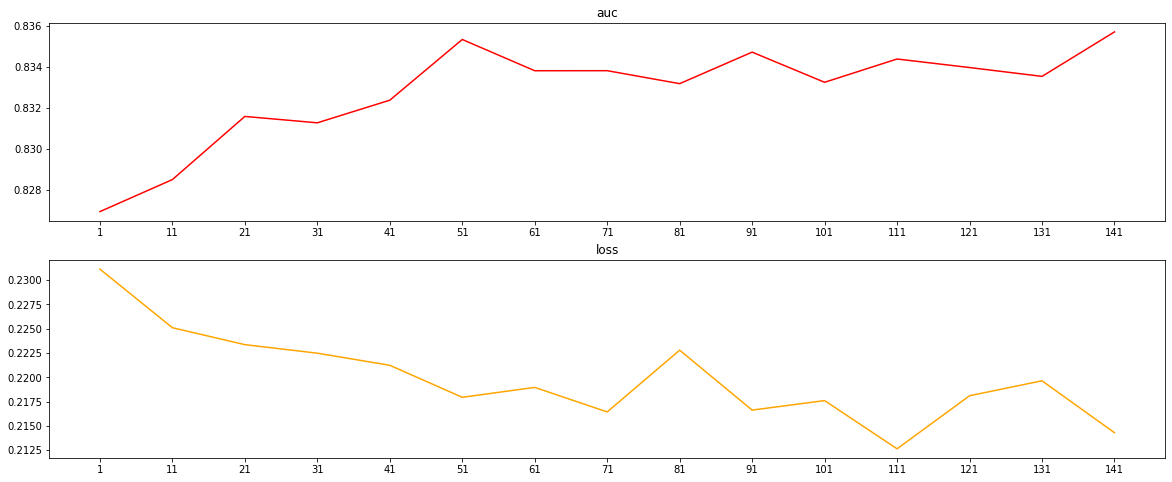

In [37]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'orange')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [38]:
auc = []
loss = []
epoch = np.arange(130, 150)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(i, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 128, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 12ms/step - loss: 1.0300 - auc: 0.6624 - val_loss: 0.3695 - val_auc: 0.8416
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.3092 - auc: 0.7716 - val_loss: 0.2464 - val_auc: 0.8448
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2600 - auc: 0.7761 - val_loss: 0.2333 - val_auc: 0.8511
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2528 - auc: 0.7821 - val_loss: 0.2299 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 0s 11ms/step - loss: 0.9948 - auc: 0.6637 - val_loss: 0.3453 - val_auc: 0.8372
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2991 - auc: 0.7628 - val_loss: 0.2426 - val_auc: 0.8456
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2589 - auc: 0.7703 - val_loss: 0.2319 - val_auc: 0.8513
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2531 - auc: 0.7743 - val_loss: 0.2285 - val

_________________________________________________________________
dense_742 (Dense)            (None, 135)               17415     
_________________________________________________________________
dense_743 (Dense)            (None, 1)                 136       
Total params: 21,391
Trainable params: 21,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 1.0216 - auc: 0.6640 - val_loss: 0.

Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2496 - auc: 0.7893 - val_loss: 0.2279 - val_auc: 0.8529
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2489 - auc: 0.7915 - val_loss: 0.2293 - val_auc: 0.8505
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2489 - auc: 0.7898 - val_loss: 0.2291 - val_auc: 0.8513
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2490 - auc: 0.7900 - val_loss: 0.2284 - val_auc: 0.8498
Epoch 10/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2494 - auc: 0.7914 - val_loss: 0.2284 - val_auc: 0.8485
Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_759 (Dense)            (None, 128)               3840      
_________________________________________________________________
dropout_94 (Dropout)         (None, 128)               0     

38/38 [==============================] - 1s 15ms/step - loss: 1.0116 - auc: 0.6630 - val_loss: 0.3449 - val_auc: 0.8386
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2984 - auc: 0.7642 - val_loss: 0.2416 - val_auc: 0.8478
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2594 - auc: 0.7648 - val_loss: 0.2333 - val_auc: 0.8506
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2528 - auc: 0.7749 - val_loss: 0.2281 - val_auc: 0.8527
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2517 - auc: 0.7765 - val_loss: 0.2292 - val_auc: 0.8578
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2501 - auc: 0.7825 - val_loss: 0.2285 - val_auc: 0.8516
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2493 - auc: 0.7872 - val_loss: 0.2300 - val_auc: 0.8524
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2497 - auc: 0.7840 - val_l

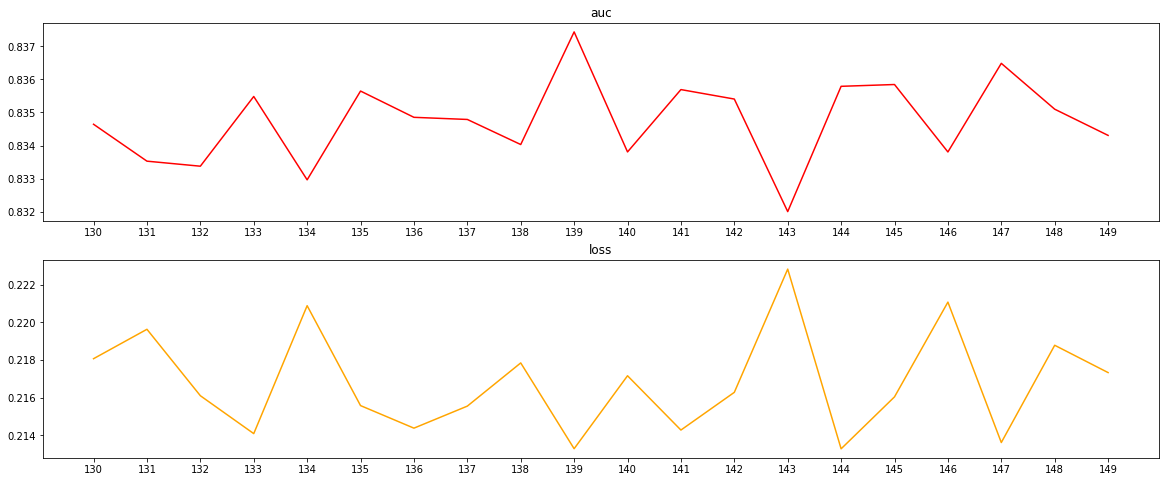

In [39]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'orange')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [40]:
auc = []
loss = []
epoch = np.arange(32, 136, 8)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(139, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = i, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

150/150 [==============================] - 1s 5ms/step - loss: 0.4836 - auc: 0.6902 - val_loss: 0.2404 - val_auc: 0.8388
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 0.2615 - auc: 0.7456 - val_loss: 0.2406 - val_auc: 0.8416
Epoch 3/10
150/150 [==============================] - 0s 3ms/step - loss: 0.2587 - auc: 0.7563 - val_loss: 0.2457 - val_auc: 0.8461
Epoch 4/10
150/150 [==============================] - 0s 3ms/step - loss: 0.2566 - auc: 0.7613 - val_loss: 0.242

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

86/86 [==============================] - 1s 8ms/step - loss: 0.6290 - auc: 0.6694 - val_loss: 0.2381 - val_auc: 0.8413
Epoch 2/10
86/86 [==============================] - 0s 3ms/step - loss: 0.2596 - auc: 0.7661 - val_loss: 0.2295 - val_auc: 0.8497
Epoch 3/10
86/86 [==============================] - 0s 4ms/step - loss: 0.2540 - auc: 0.7780 - val_loss: 0.2280 - val_auc: 0.8462
Epoch 4/10
86/86 [==============================] - 0s 3ms/step - loss: 0.2517 - auc: 0.7873 - val_loss: 0.2284 - val_

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

60/60 [==============================] - 0s 8ms/step - loss: 0.7840 - auc: 0.6227 - val_loss: 0.2620 - val_auc: 0.8347
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2640 - auc: 0.7765 - val_loss: 0.2293 - val_auc: 0.8493
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2525 - auc: 0.7955 - val_loss: 0.2270 - val_auc: 0.8522
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2489 - auc: 0.8056 - val_loss: 0.2265 - val_

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

47/47 [==============================] - 0s 10ms/step - loss: 0.9171 - auc: 0.6500 - val_loss: 0.3028 - val_auc: 0.8352
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.2840 - auc: 0.7436 - val_loss: 0.2338 - val_auc: 0.8473
Epoch 3/10
47/47 [==============================] - 0s 6ms/step - loss: 0.2584 - auc: 0.7577 - val_loss: 0.2274 - val_auc: 0.8523
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.2525 - auc: 0.7774 - val_loss: 0.2286 - val

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 1s 15ms/step - loss: 1.0291 - auc: 0.6535 - val_loss: 0.3552 - val_auc: 0.8349
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.3041 - auc: 0.7595 - val_loss: 0.2447 - val_auc: 0.8447
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2593 - auc: 0.7723 - val_loss: 0.2324 - val_auc: 0.8500
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2527 - auc: 0.7770 - val_loss: 0.2290 - val

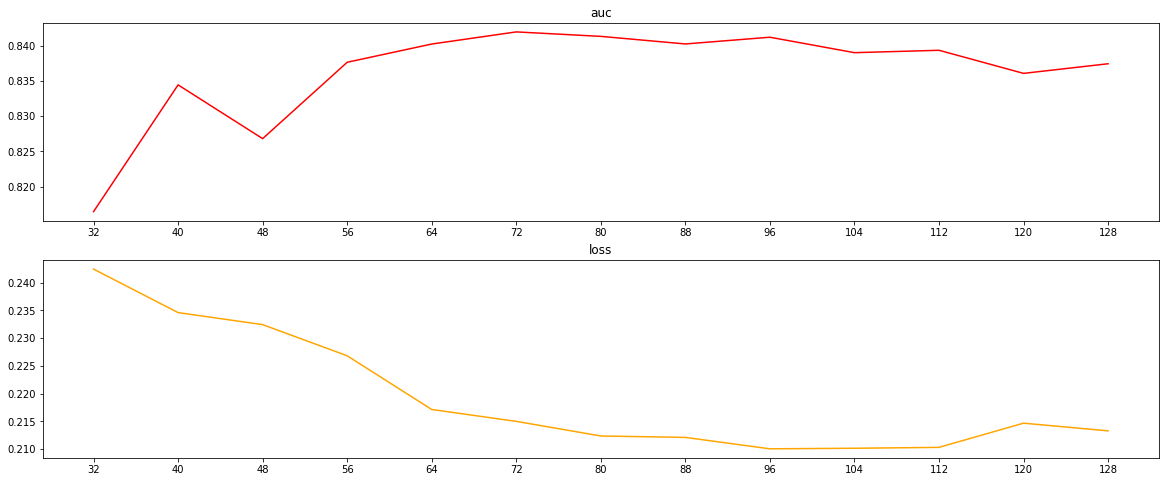

In [41]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'orange')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [42]:
auc = []
loss = []
epoch = np.arange(65, 80)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(139, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = i, epochs = 10, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

74/74 [==============================] - 1s 9ms/step - loss: 0.6880 - auc: 0.6381 - val_loss: 0.2433 - val_auc: 0.8390
Epoch 2/10
74/74 [==============================] - 0s 3ms/step - loss: 0.2595 - auc: 0.7766 - val_loss: 0.2292 - val_auc: 0.8481
Epoch 3/10
74/74 [==============================] - 0s 4ms/step - loss: 0.2537 - auc: 0.7840 - val_loss: 0.2280 - val_auc: 0.8498
Epoch 4/10
74/74 [==============================] - 0s 4ms/step - loss: 0.2517 - auc: 0.7916 - val_loss: 0.2276 - val_

dense_832 (Dense)            (None, 139)               17931     
_________________________________________________________________
dense_833 (Dense)            (None, 1)                 140       
Total params: 21,911
Trainable params: 21,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

71/71 [==============================] - 1s 8ms/step - loss: 0.7096 - auc: 0.6411 - val_loss: 0.2463 - val_auc: 0.8404
Epoch 2/10
71/71 [==========================

Model: "sequential_280"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_840 (Dense)            (None, 128)               3840      
_________________________________________________________________
dropout_121 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_841 (Dense)            (None, 139)               17931     
_________________________________________________________________
dense_842 (Dense)            (None, 1)                 140       
Total params: 21,911
Trainable params: 21,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64

64/64 [==============================] - 0s 5ms/step - loss: 0.2539 - auc: 0.7820 - val_loss: 0.2272 - val_auc: 0.8509
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2522 - auc: 0.7913 - val_loss: 0.2292 - val_auc: 0.8477
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2514 - auc: 0.7900 - val_loss: 0.2266 - val_auc: 0.8445
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2504 - auc: 0.7923 - val_loss: 0.2268 - val_auc: 0.8461
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2495 - auc: 0.7955 - val_loss: 0.2267 - val_auc: 0.8447
Epoch 8/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2486 - auc: 0.8005 - val_loss: 0.2282 - val_auc: 0.8414
Epoch 9/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2500 - auc: 0.7895 - val_loss: 0.2258 - val_auc: 0.8428
Epoch 10/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2487 - auc: 0.8030 - val_l

61/61 [==============================] - 1s 8ms/step - loss: 0.7768 - auc: 0.6311 - val_loss: 0.2606 - val_auc: 0.8383
Epoch 2/10
61/61 [==============================] - 0s 3ms/step - loss: 0.2632 - auc: 0.7775 - val_loss: 0.2296 - val_auc: 0.8515
Epoch 3/10
61/61 [==============================] - 0s 3ms/step - loss: 0.2521 - auc: 0.7941 - val_loss: 0.2283 - val_auc: 0.8504
Epoch 4/10
61/61 [==============================] - 0s 3ms/step - loss: 0.2493 - auc: 0.8040 - val_loss: 0.2271 - val_auc: 0.8476
Epoch 5/10
61/61 [==============================] - 0s 3ms/step - loss: 0.2499 - auc: 0.7965 - val_loss: 0.2274 - val_auc: 0.8458
Epoch 6/10
61/61 [==============================] - 0s 4ms/step - loss: 0.2495 - auc: 0.7998 - val_loss: 0.2286 - val_auc: 0.8460
Epoch 7/10
61/61 [==============================] - 0s 4ms/step - loss: 0.2483 - auc: 0.8041 - val_loss: 0.2282 - val_auc: 0.8465
Epoch 8/10
61/61 [==============================] - 0s 4ms/step - loss: 0.2492 - auc: 0.8002 - val_lo

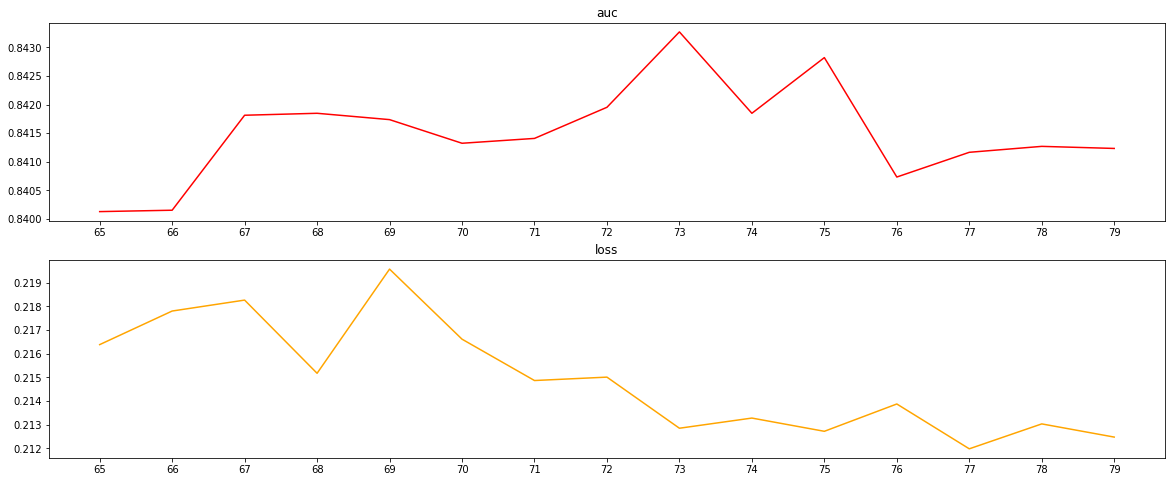

In [43]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'orange')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [44]:
auc = []
loss = []
epoch = np.arange(1, 101, 10)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(139, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 73, epochs = i, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

66/66 [==============================] - 1s 8ms/step - loss: 0.7379 - auc: 0.6349 - val_loss: 0.2524 - val_auc: 0.8404
Model: "sequential_290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_870 (Dense)            (None, 128)               3840      
_________________________________________________________________
dropout_131 (Dropout)        (None, 128)               0         
___________________________________

Model: "sequential_292"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_876 (Dense)            (None, 128)               3840      
_________________________________________________________________
dropout_133 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_877 (Dense)            (None, 139)               17931     
_________________________________________________________________
dense_878 (Dense)            (None, 1)                 140       
Total params: 21,911
Trainable params: 21,911
Non-trainable params: 0
_________________________________________________________________
Epoch 1/31

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64

66/66 [==============================] - 0s 4ms/step - loss: 0.2486 - auc: 0.8004 - val_loss: 0.2283 - val_auc: 0.8437
Epoch 18/51
66/66 [==============================] - 0s 4ms/step - loss: 0.2487 - auc: 0.8007 - val_loss: 0.2277 - val_auc: 0.8452
Epoch 19/51
66/66 [==============================] - 0s 5ms/step - loss: 0.2471 - auc: 0.8054 - val_loss: 0.2287 - val_auc: 0.8452
Epoch 20/51
66/66 [==============================] - 0s 4ms/step - loss: 0.2502 - auc: 0.7997 - val_loss: 0.2284 - val_auc: 0.8460
Epoch 21/51
66/66 [==============================] - 0s 3ms/step - loss: 0.2492 - auc: 0.7990 - val_loss: 0.2277 - val_auc: 0.8457
Epoch 22/51
66/66 [==============================] - 0s 5ms/step - loss: 0.2485 - auc: 0.8013 - val_loss: 0.2285 - val_auc: 0.8489
Epoch 23/51
66/66 [==============================] - 0s 3ms/step - loss: 0.2498 - auc: 0.8007 - val_loss: 0.2295 - val_auc: 0.8474
Epoch 24/51
66/66 [==============================] - 0s 4ms/step - loss: 0.2517 - auc: 0.7887 -

66/66 [==============================] - 0s 4ms/step - loss: 0.2490 - auc: 0.8017 - val_loss: 0.2270 - val_auc: 0.8472
Epoch 6/71
66/66 [==============================] - 0s 4ms/step - loss: 0.2488 - auc: 0.8021 - val_loss: 0.2280 - val_auc: 0.8415
Epoch 7/71
66/66 [==============================] - 0s 5ms/step - loss: 0.2494 - auc: 0.7964 - val_loss: 0.2270 - val_auc: 0.8454
Epoch 8/71
66/66 [==============================] - 0s 5ms/step - loss: 0.2483 - auc: 0.8020 - val_loss: 0.2272 - val_auc: 0.8435
Epoch 9/71
66/66 [==============================] - 0s 4ms/step - loss: 0.2497 - auc: 0.7981 - val_loss: 0.2288 - val_auc: 0.8418
Epoch 10/71
66/66 [==============================] - 0s 4ms/step - loss: 0.2502 - auc: 0.7897 - val_loss: 0.2291 - val_auc: 0.8429
Epoch 11/71
66/66 [==============================] - 0s 5ms/step - loss: 0.2496 - auc: 0.7927 - val_loss: 0.2286 - val_auc: 0.8405
Epoch 12/71
66/66 [==============================] - 0s 5ms/step - loss: 0.2492 - auc: 0.7973 - val

66/66 [==============================] - 0s 4ms/step - loss: 0.2491 - auc: 0.8014 - val_loss: 0.2271 - val_auc: 0.8501
Epoch 47/81
66/66 [==============================] - 0s 3ms/step - loss: 0.2494 - auc: 0.8014 - val_loss: 0.2281 - val_auc: 0.8475
Epoch 48/81
66/66 [==============================] - 0s 3ms/step - loss: 0.2519 - auc: 0.7857 - val_loss: 0.2285 - val_auc: 0.8508
Epoch 49/81
66/66 [==============================] - 0s 3ms/step - loss: 0.2508 - auc: 0.7960 - val_loss: 0.2344 - val_auc: 0.8459
Epoch 50/81
66/66 [==============================] - 0s 4ms/step - loss: 0.2545 - auc: 0.7807 - val_loss: 0.2306 - val_auc: 0.8509
Epoch 51/81
66/66 [==============================] - 0s 5ms/step - loss: 0.2500 - auc: 0.7993 - val_loss: 0.2277 - val_auc: 0.8509
Epoch 52/81
66/66 [==============================] - 0s 3ms/step - loss: 0.2480 - auc: 0.8038 - val_loss: 0.2298 - val_auc: 0.8462
Epoch 53/81
66/66 [==============================] - 0s 5ms/step - loss: 0.2493 - auc: 0.7991 -

66/66 [==============================] - 0s 4ms/step - loss: 0.2483 - auc: 0.8075 - val_loss: 0.2288 - val_auc: 0.8470
Epoch 78/91
66/66 [==============================] - 0s 4ms/step - loss: 0.2500 - auc: 0.7971 - val_loss: 0.2281 - val_auc: 0.8475
Epoch 79/91
66/66 [==============================] - ETA: 0s - loss: 0.2498 - auc: 0.807 - 0s 3ms/step - loss: 0.2490 - auc: 0.8061 - val_loss: 0.2283 - val_auc: 0.8501
Epoch 80/91
66/66 [==============================] - 0s 3ms/step - loss: 0.2487 - auc: 0.8017 - val_loss: 0.2298 - val_auc: 0.8479
Epoch 81/91
66/66 [==============================] - 0s 3ms/step - loss: 0.2489 - auc: 0.8037 - val_loss: 0.2280 - val_auc: 0.8470
Epoch 82/91
66/66 [==============================] - 0s 3ms/step - loss: 0.2480 - auc: 0.8012 - val_loss: 0.2285 - val_auc: 0.8465
Epoch 83/91
66/66 [==============================] - 0s 3ms/step - loss: 0.2477 - auc: 0.8041 - val_loss: 0.2269 - val_auc: 0.8435
Epoch 84/91
66/66 [==============================] - 0s 3

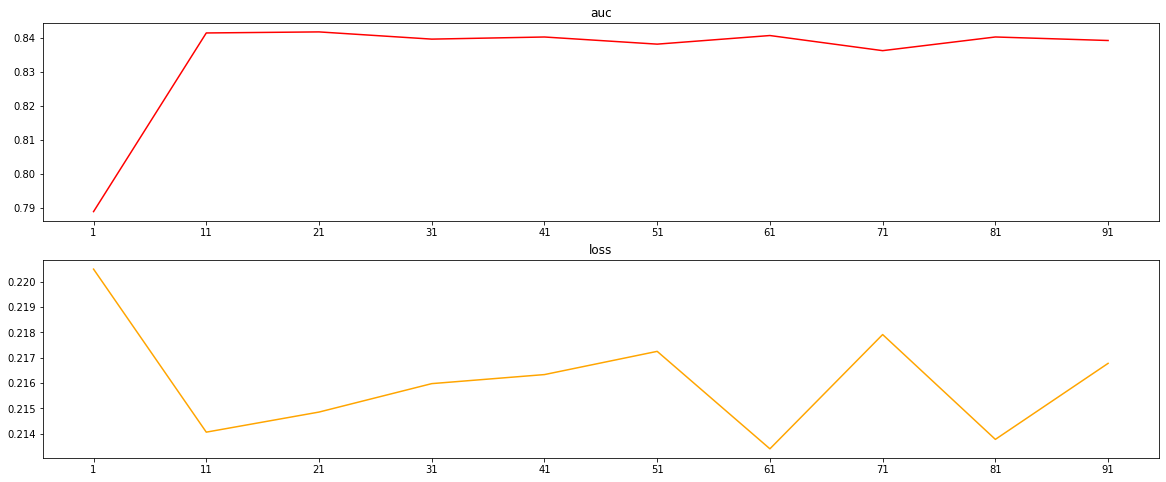

In [45]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'orange')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [46]:
auc = []
loss = []
epoch = np.arange(20, 30)
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(139, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 73, epochs = i, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

66/66 [==============================] - 1s 8ms/step - loss: 0.7379 - auc: 0.6349 - val_loss: 0.2524 - val_auc: 0.8404
Epoch 2/20
66/66 [==============================] - 0s 3ms/step - loss: 0.2613 - auc: 0.7795 - val_loss: 0.2296 - val_auc: 0.8498
Epoch 3/20
66/66 [==============================] - 0s 5ms/step - loss: 0.2533 - auc: 0.7873 - val_loss: 0.2280 - val_auc: 0.8506
Epoch 4/20
66/66 [==============================] - 0s 4ms/step - loss: 0.2504 - auc: 0.7971 - val_loss: 0.2286 - val_

Epoch 1/22

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

66/66 [==============================] - 1s 10ms/step - loss: 0.7379 - auc: 0.6349 - val_loss: 0.2524 - val_auc: 0.8404
Epoch 2/22
66/66 [==============================] - 0s 4ms/step - loss: 0.2613 - auc: 0.7795 - val_loss: 0.2296 - val_auc: 0.8498
Epoch 3/22
66/66 [==============================] - 0s 4ms/step - loss: 0.2533 - auc: 0.7873 - val_loss: 0.2280 - val_auc: 0.8506
Epoch 4/22
66/66 [==============================] - 0s 3ms/step - loss: 0.2504 - auc: 0.7971 - val_loss: 0.2286 - val

Epoch 1/24

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

66/66 [==============================] - 0s 7ms/step - loss: 0.7379 - auc: 0.6349 - val_loss: 0.2524 - val_auc: 0.8404
Epoch 2/24
66/66 [==============================] - 0s 3ms/step - loss: 0.2613 - auc: 0.7795 - val_loss: 0.2296 - val_auc: 0.8498
Epoch 3/24
66/66 [==============================] - 0s 3ms/step - loss: 0.2533 - auc: 0.7873 - val_loss: 0.2280 - val_auc: 0.8506
Epoch 4/24
66/66 [==============================] - 0s 3ms/step - loss: 0.2504 - auc: 0.7971 - val_loss: 0.2286 - val_

66/66 [==============================] - 0s 3ms/step - loss: 0.2485 - auc: 0.8013 - val_loss: 0.2285 - val_auc: 0.8489
Epoch 23/25
66/66 [==============================] - 0s 3ms/step - loss: 0.2498 - auc: 0.8007 - val_loss: 0.2295 - val_auc: 0.8474
Epoch 24/25
66/66 [==============================] - 0s 3ms/step - loss: 0.2517 - auc: 0.7887 - val_loss: 0.2291 - val_auc: 0.8495
Epoch 25/25
66/66 [==============================] - 0s 3ms/step - loss: 0.2514 - auc: 0.7929 - val_loss: 0.2285 - val_auc: 0.8476
Model: "sequential_305"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_915 (Dense)            (None, 128)               3840      
_________________________________________________________________
dropout_146 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_916 (Dense)            (None, 139)               17931     
__

Epoch 1/29

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

66/66 [==============================] - 1s 8ms/step - loss: 0.7379 - auc: 0.6349 - val_loss: 0.2524 - val_auc: 0.8404
Epoch 2/29
66/66 [==============================] - 0s 3ms/step - loss: 0.2613 - auc: 0.7795 - val_loss: 0.2296 - val_auc: 0.8498
Epoch 3/29
66/66 [==============================] - 0s 3ms/step - loss: 0.2533 - auc: 0.7873 - val_loss: 0.2280 - val_auc: 0.8506
Epoch 4/29
66/66 [==============================] - 0s 3ms/step - loss: 0.2504 - auc: 0.7971 - val_loss: 0.2286 - val_

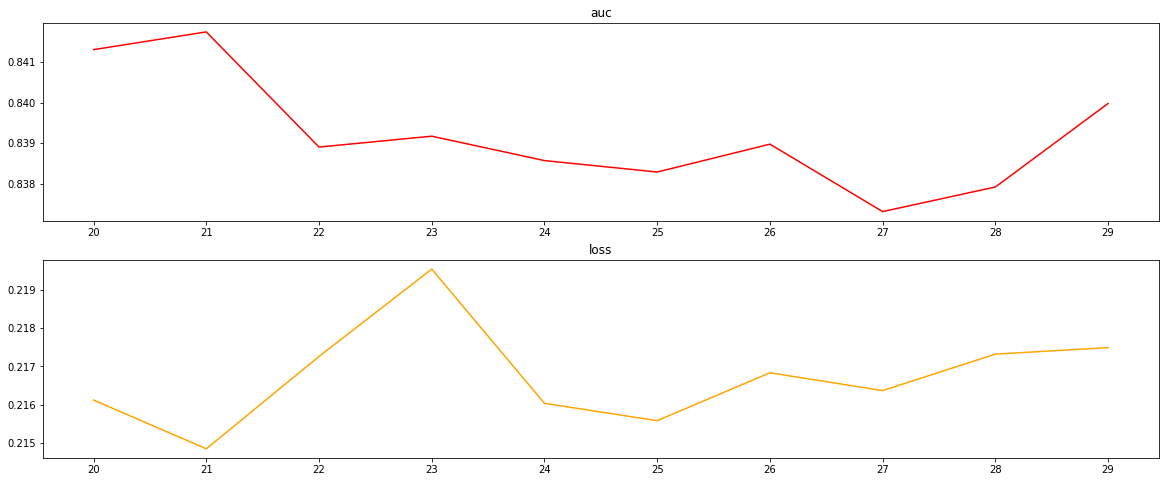

In [47]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'orange')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()

In [2]:
auc = []
loss = []
epoch = ['softmax', 'sigmoid', 'tanh', 'relu']
for i in epoch:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                  kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dropout(0.3, seed = 0),
            tf.keras.layers.Dense(139, activation = 'tanh',kernel_initializer=glorot_normal(seed=0), 
                                   kernel_regularizer = tf.keras.regularizers.l2()),
            tf.keras.layers.Dense(1, activation = i, kernel_initializer=glorot_normal(seed=0),
                                  kernel_regularizer = tf.keras.regularizers.l2())
            ])
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00773, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
             ,loss = tf.keras.losses.binary_crossentropy
             ,metrics=['AUC'])
    model.fit(Xtrain, Ytrain, batch_size = 73, epochs = 21, validation_split = 0.2, shuffle = False)
    model.summary()
    y_predict = model.predict(Xtest)
    auc.append(roc_auc_score(Ytest, y_predict))
    loss.append(log_loss(Ytest, y_predict))
print(max(auc), epoch[auc.index(max(auc))])
print(auc)
print(min(loss), epoch[loss.index(min(loss))])
print(loss)

Epoch 1/21

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

66/66 [==============================] - 1s 21ms/step - loss: 14.4340 - auc: 0.5000 - val_loss: 14.3478 - val_auc: 0.5000
Epoch 2/21
66/66 [==============================] - 0s 4ms/step - loss: 14.2359 - auc: 0.5000 - val_loss: 14.3470 - val_auc: 0.5000
Epoch 3/21
66/66 [==============================] - 0s 5ms/step - loss: 14.2358 - auc: 0.5000 - val_loss: 14.3470 - val_auc: 0.5000
Epoch 4/21
66/66 [==============================] - 0s 4ms/step - loss: 14.2358 - auc: 0.5000 - val_loss: 14.34

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


66/66 [==============================] - 1s 14ms/step - loss: 0.7379 - auc: 0.6349 - val_loss: 0.2524 - val_auc: 0.8404
Epoch 2/21
66/66 [==============================] - 0s 5ms/step - loss: 0.2613 - auc: 0.7795 - val_loss: 0.2296 - val_auc: 0.8498
Epoch 3/21
66/66 [==============================] - 0s 3ms/step - loss: 0.2533 - auc: 0.7873 - val_loss: 0.2280 - val_auc: 0.8506
Epoch 4/21
66/66 [==============================] - 0s 3ms/step - loss: 0.2504 - auc: 0.7971 - val_loss: 0.2286 - val_auc: 0.8477
Epoch 5/21
66/66 [==============================] - 0s 3ms/step - loss: 0.2490 - auc: 0.8017 - val_loss: 0.2270 - val_auc: 0.8472
Epoch 6/21
66/66 [==============================] - 0s 3ms/step - loss: 0.2488 - auc: 0.8021 - val_loss: 0.2280 - val_auc: 0.8415
Epoch 7/21
66/66 [==============================] - 0s 3ms/step - loss: 0.2494 - auc: 0.7964 - val_loss: 0.2270 - val_auc: 0.8454
Epoch 8/21
66/66 [==============================] - 0s 4ms/step - loss: 0.2483 - auc: 0.8020 - val_l

InvalidArgumentError:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential_2/dense_8/Tanh:0) = ] [[-0.0511600487][-0.247552][0.516378701]...] [y (Cast_3/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/else/_1/assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_12247]

Function call stack:
train_function


In [ ]:
figure, ax = plt.subplots(2, figsize = (20, 8))
ax[0].plot(epoch, auc, color = 'red')
ax[0].set_title('auc')
ax[0].set_xticks(epoch)
ax[1].plot(epoch, loss, color = 'orange')
ax[1].set_title('loss')
ax[1].set_xticks(epoch)
plt.show()